In [3]:
from shapely.geometry import MultiPolygon, Polygon
import json
from shapely.geometry import shape, mapping
from shapely.ops import unary_union
import os
import csv

In [2]:
file = "..\\rawData\\countries.geoJson"

with open(file, 'r') as f:
    data = json.load(f)

In [24]:
# find index of russia
for i, feature in enumerate(data['features']):
    if feature['properties']['name'] == 'France':
        idx = i
        break

print(f"Index : {idx}")

Index : 21


In [26]:
tolerance = 0
idx = 21

feature = data['features'][idx]
iso3 = feature['properties']['ISO3166-1-Alpha-3']
geometry = shape(feature['geometry'])
simplified_geom = geometry.simplify(tolerance, preserve_topology=True)

# Ensure geometry is iterable
if isinstance(simplified_geom, Polygon):
    polygons = [simplified_geom]
elif isinstance(simplified_geom, MultiPolygon):
    polygons = list(simplified_geom.geoms)
else:
    raise TypeError(f"Unsupported geometry type: {simplified_geom.geom_type}")

outline_coords = []

for polygon in polygons:
    outline = polygon.boundary
    if outline.geom_type == 'MultiLineString':
        outline_coords.extend([list(line.coords) for line in outline.geoms])
    else:
        outline_coords.append(list(outline.coords))


Text(0.5, 1.0, 'Outline of FRA with tolerance 0')

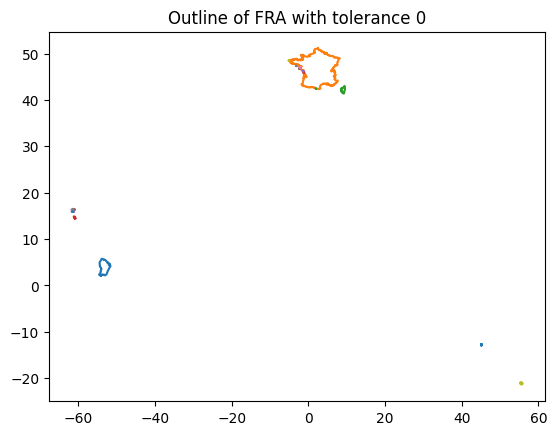

In [27]:
# plot the outline
import matplotlib.pyplot as plt
for coords in outline_coords:
    x, y = zip(*coords)
    plt.plot(x, y)

plt.title(f"Outline of {iso3} with tolerance {tolerance}")

In [ ]:
import geopandas as gpd
from shapely.geometry import shape, Polygon, MultiPolygon

tolerance = 0
idx = 47

# Convert the feature to a GeoDataFrame
feature = data['features'][idx]
geom = shape(feature['geometry'])
iso3 = feature['properties']['ISO3166-1-Alpha-3']

gdf = gpd.GeoDataFrame({'geometry': [geom]}, crs="EPSG:4326")  # Assuming original is WGS84

# Reproject to EPSG:3857
gdf = gdf.to_crs(epsg=3857)

# Simplify geometry (in meters, since EPSG:3857 units)
simplified_geom = gdf.geometry.iloc[0].simplify(tolerance, preserve_topology=True)

# Now handle MultiPolygon or Polygon
if isinstance(simplified_geom, Polygon):
    polygons = [simplified_geom]
elif isinstance(simplified_geom, MultiPolygon):
    polygons = list(simplified_geom.geoms)
else:
    raise TypeError(f"Unsupported geometry type: {simplified_geom.geom_type}")

outline_coords = []

for polygon in polygons:
    # Only take exterior ring coordinates, ignoring holes
    outline_coords.append(list(polygon.exterior.coords))


Text(0.5, 1.0, 'Outline of RUS with tolerance 0')

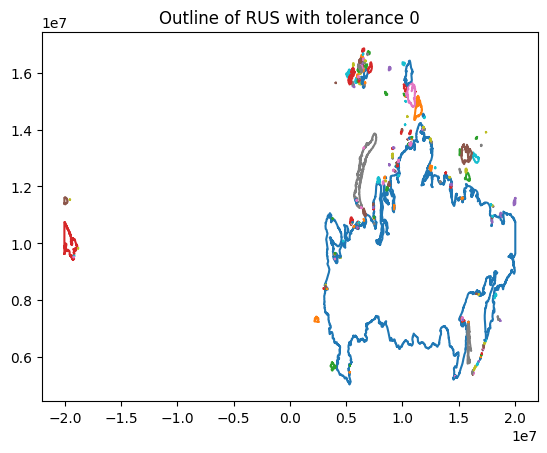

In [13]:
# plot the outline
import matplotlib.pyplot as plt
for coords in outline_coords:
    x, y = zip(*coords)
    plt.plot(x, y)

plt.title(f"Outline of {iso3} with tolerance {tolerance}")

In [29]:
# load jsoin file
import json
file1 = "../processedData/json/epsg4326/tol0/RUS.json"
file2 = "../processedData/json/epsg3857/tol0/RUS.json"

with open(file1, 'r') as f:
    data1 = json.load(f)

with open(file2, 'r') as f:
    data2 = json.load(f)

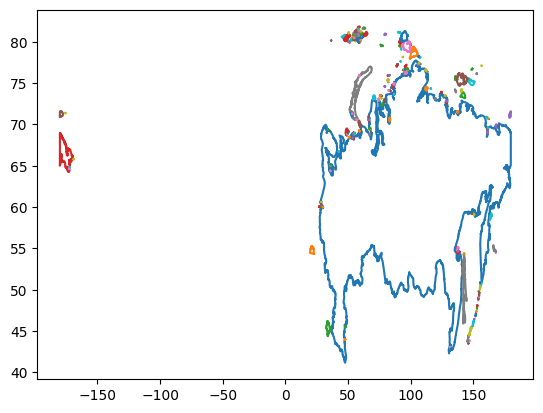

In [31]:
# plot the outline
import matplotlib.pyplot as plt
for coords in data1['coordinates']:
    x, y = zip(*coords)
    plt.plot(x, y, label='EPSG:4326')

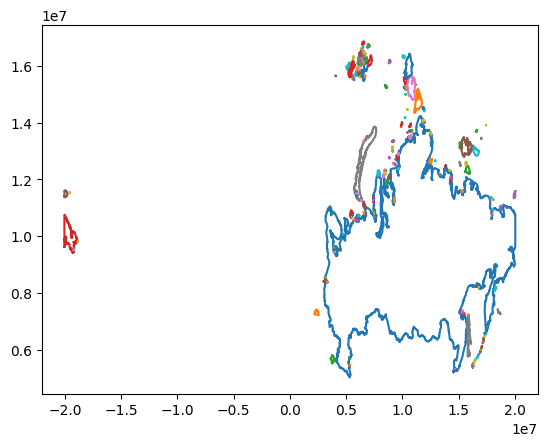

In [32]:
for coords in data2['coordinates']:
    x, y = zip(*coords)
    plt.plot(x, y, label='EPSG:3857')